# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:

#### 1. Import data sets
#### 2. Security implications
#### 3. Customer behavior in different geografic areas
#### 4. Exclude low-activity customer
#### 5. Customer profiling
#### 6. Visualizations
#### 7. Aggregate the max, mean, and min variables on a customer-profile level
#### 8. Compare customer profiles with regions and departments
#### 9. Export

In [65]:
# Install data libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Import data sets

In [66]:
# Tell Python to remember a main folder path
path = r'C:\Users\Frederick\Documents\CareerFoundry\CF - Data Analytics Immersion\Achievement4\04-2024 Instacart Basket Analysis'

In [67]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## 2. Security implications

In [68]:
df_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,186194,682486,11243,16,3,...,Frequent Customer,Robert,Herman,Male,Nevada,67,1/26/2017,3,married,58329


There are columns that refer to client first and surnames, as well as gender, state, age, family status and number of dependants. These columns are personally identifiable information (PII).

In [69]:
# Dropping personal information
df_merged.drop(columns=['first_name','surname'], inplace= True)

In [70]:
df_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,...,spender_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,186194,682486,11243,16,3,...,Low_spender,6.0,Frequent Customer,Male,Nevada,67,1/26/2017,3,married,58329


The data is now unpersonalised and therefore secure.

## 3. Customer behavior in different geographic areas

In [71]:
# Creating a region column and grouping states Northeast
df_merged.loc[df_merged['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'

In [72]:
# Creating a region column and grouping states Midwest
df_merged.loc[df_merged['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'

In [73]:
# Creating a region column and grouping states South
df_merged.loc[df_merged['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'

In [74]:
# Creating a region column and grouping states Mountain
df_merged.loc[df_merged['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'Mountain'

In [75]:
# Checking if all columns have been attributed a value
df_merged['region'].value_counts(dropna= False)

region
South        65
Mountain     37
Northeast    30
Midwest      26
Name: count, dtype: int64

In [76]:
# Determining whether there is a difference in spending habits
df_avg_spend = df_merged.groupby(['frequency_flag'])['prices'].mean()

Text(0, 0.5, 'Avg per item')

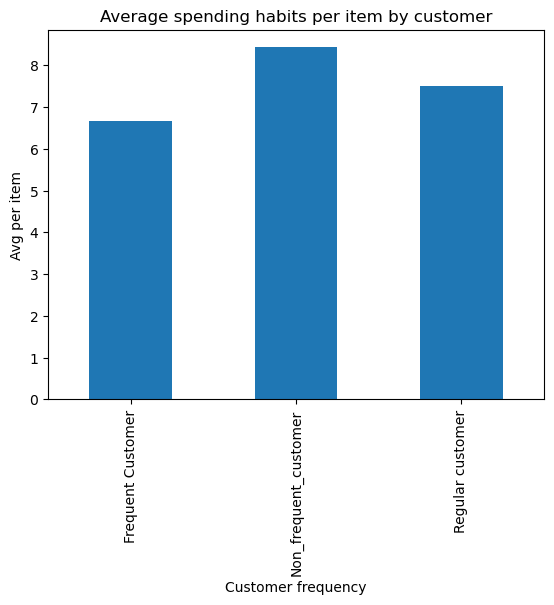

In [77]:
bar_avg_spend = df_avg_spend.plot.bar()
plt.title('Average spending habits per item by customer')
plt.xlabel('Customer frequency')
plt.ylabel('Avg per item')

In [78]:
# Determining whether there is a difference in spending habits between different regions
df_spend_region = df_merged.groupby(['region'])['prices'].mean()
df_spend_region.reset_index()

,region,prices
0,Midwest,6.473077
1,Mountain,7.362162
2,Northeast,8.150000
3,South,6.655385


Text(0.5, 0, 'Region')

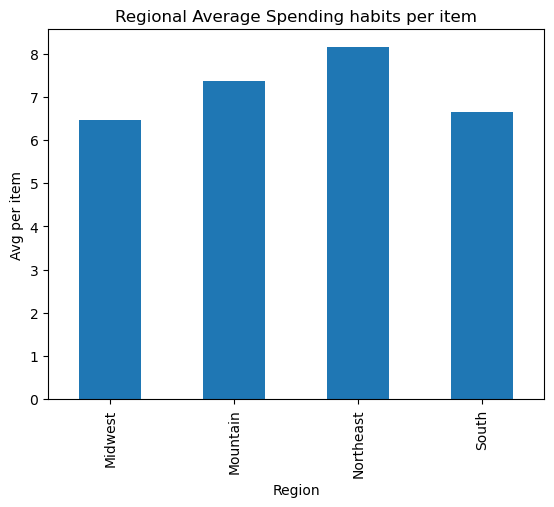

In [79]:
bar_spend_region = df_spend_region.plot.bar(ylabel='avg.spend')
plt.title('Regional Average Spending habits per item')
plt.ylabel('Avg per item')
plt.xlabel('Region')

In [80]:
# Export the visualizations
bar_spend_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spend_region.png'))

In [81]:
bar_avg_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_avg_spend.png'))

# 4. Exclude low-activity customers

In [82]:
# creating exclusion flag column
df_merged.loc[df_merged['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
df_merged.loc[df_merged['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [83]:
df_merged['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    154
Excluded          4
Name: count, dtype: int64

In [84]:
# Create data frame with only the excluded data
df_merged_excluded = df_merged[df_merged['exclusion_flag']=='Excluded']

In [85]:
# Create data frame with only the not-excluded data
df_merged_not_excluded =  df_merged[df_merged['exclusion_flag']=='Not Excluded']

In [86]:
len(df_merged_excluded) + len (df_merged_not_excluded) == len(df_merged)

True

In [87]:
# Export new data frame
df_merged_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_not_excluded'))

# 5. Customer profiling

In [88]:
# Creating income categories
df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'
df_merged_not_excluded.loc[(df_merged_not_excluded['income'] >= 50000) & (df_merged_not_excluded['income']< 100000),'income_type'] = 'Middle'
df_merged_not_excluded.loc[df_merged_not_excluded['income']>= 100000,'income_type'] = 'High'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_10212\2697743029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'


In [89]:
# Creating age categories
df_merged_not_excluded.loc[df_merged_not_excluded['age']< 40,'age_type'] = 'Young Adult'
df_merged_not_excluded.loc[(df_merged_not_excluded['age'] >= 40) & (df_merged_not_excluded['age']< 65),'age_type'] = 'Middle Aged'
df_merged_not_excluded.loc[df_merged_not_excluded['age']>= 65,'age_type'] = 'Senior'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_10212\989960268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['age']< 40,'age_type'] = 'Young Adult'


In [90]:
# Creating n_dependants categories
df_merged_not_excluded['dependant_type'] = 'No Dependants'
df_merged_not_excluded.loc[df_merged_not_excluded['n_dependants']> 0,'dependant_type'] = 'Has Dependants'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_10212\2365163431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['dependant_type'] = 'No Dependants'


# 6. Visualizations

(-1.0999999988189388, 1.099999999943759, -1.09999998930065, 1.0999997784976414)

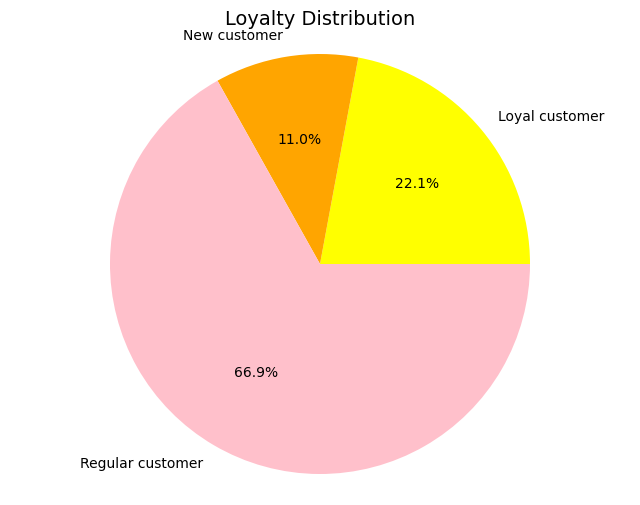

In [105]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (df_merged_not_excluded['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_pie = plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['yellow', 'orange', 'pink'])
plt.title('Loyalty Distribution', fontsize=14)
plt.axis('equal')

In [118]:
loyalty_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_loyalty_changed.png'))

AttributeError: 'tuple' object has no attribute 'figure'

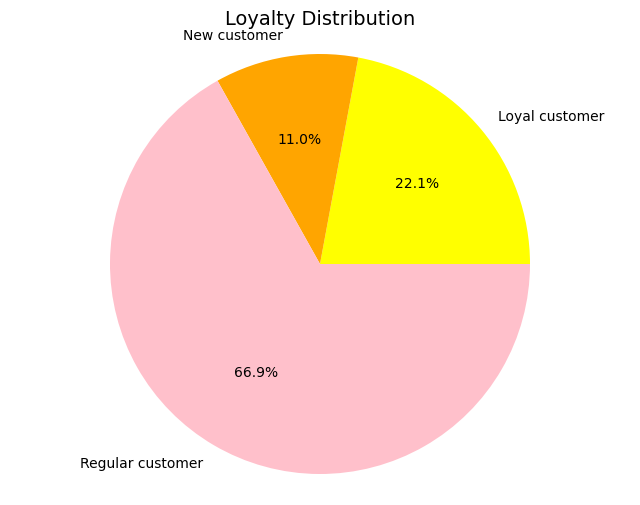

In [121]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (df_merged_not_excluded['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the pie chart on the specified axis
ax.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['yellow', 'orange', 'pink'])

# Set the title for the pie chart
ax.set_title('Loyalty Distribution', fontsize=14)

# Ensure the pie chart is a circle
ax.axis('equal')

plt.show()

In [122]:
# Save the figure
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_changed_changed.png')
fig.savefig(save_path)

In [123]:
# Close the figure
plt.close(fig)

# 7. Aggregate the max, mean, and min variables on a customer-profile level

In [93]:
df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)

C:\Users\Frederick\AppData\Local\Temp\ipykernel_10212\1705628768.py:1: FutureWarning: The provided callable <function sum at 0x000002640749AB60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_10212\1705628768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)


In [94]:
total_expenditure

NameError: name 'total_expenditure' is not defined

In [95]:
df_merged_not_excluded.groupby('loyalty_flag').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure             order_number        
                              mean  min    max         mean min max
loyalty_flag                                                       
Loyal customer          103.017647  2.2  168.0    32.411765   3  66
New customer             23.941176  5.8   52.5     4.235294   1   8
Regular customer         37.643689  2.2   75.6    10.475728   1  29

In [96]:
df_merged_not_excluded.groupby('income_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure             order_number        
                         mean  min    max         mean min max
income_type                                                   
High                65.033333  2.2  168.0    16.743590   1  66
Low                 31.415152  5.8   52.2    10.242424   1  29
Middle              39.013953  2.2   75.6    14.162791   1  52

In [97]:
df_merged_not_excluded.groupby('region').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure             order_number        
                       mean  min    max         mean min max
region                                                      
Midwest           31.116000  5.8   49.0    13.040000   1  46
Mountain          43.402857  2.2   75.6    12.200000   1  39
Northeast        118.934483  4.5  168.0    29.310345   5  66
South             31.396923  2.2   67.2    10.000000   1  52

In [98]:
df_merged_not_excluded.groupby('dependant_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure             order_number        
                            mean  min    max         mean min max
dependant_type                                                   
Has Dependants         55.016667  2.2  168.0    15.195652   1  66
No Dependants          12.162500  2.2   31.5     9.750000   1  46

# 8. Compare customer profiles with regions and departments

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Count')

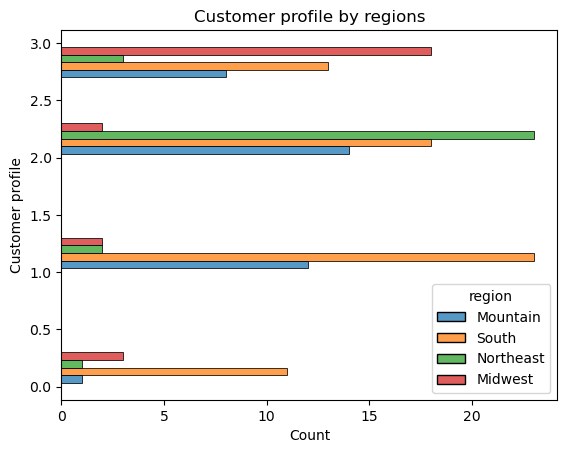

In [99]:
# Plotting histogram of customer type by region
sns.histplot(data=df_merged_not_excluded,y='n_dependants',hue='region',multiple='dodge',shrink=.8)
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('Count')

In [100]:
# Export histogram
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_profile_by_region_bar.png'))

<Figure size 640x480 with 0 Axes>

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Count')

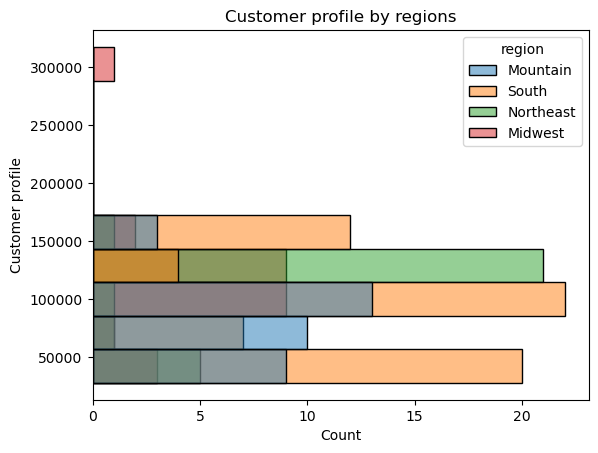

In [101]:
# Plotting histogram of customer type by region
sns.histplot(data=df_merged_not_excluded,y='income',hue='region')
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('Count')

In [102]:
# Export histogram
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_profile_income_by_region_bar.png'))

<Figure size 640x480 with 0 Axes>

# 9. Export

In [103]:
df_merged_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','4_10_final_data'))